* Preprocesar los datos para representarlos usando bag-of-words.


* Construir un modelo de regresión logística como punto base para la comparación con otros modelos más complejos.


* Construir un modelo de redes neuronales artificiales. Asimismo, debe determinar el número de neuronas en la capa o capas ocultas.


* Utiizar una técnica como crossvalidation u otra similar para establecer la robustez del modelo.


* Presentar métricas de desempeño para establecer las bondades y falencias de cada clasificador.

# TOC

1. *[Limpieza del texto](#Limpieza_del_texto)*  
1.1. *[Guardar la lista de los MSM por tipo](#lista_msm)*  
1.2. *[Eliminar el primer bloque del MSM, termina donde se encuentra la primer línea en blanco](#e_1_bloque)*  
1.3. *[Eliminar etiquetas HTML, emails y urls](#e_html)*  
1.4. *[Eliminar líneas vacías y espacios en blanco al inicio y fin de línea](#e_lvacia)*  
1.5. *[Eliminar los pares <clave: valor> restantes](#e_pares)*  
1.6. *[Eliminar símbolos](#e_simbolos)*  
1.7. *[Transformar el texto a minúscula](#t_minuscula)*  
1.8. *[Eliminar los números](#e_numeros)*  
1.9. *[Transformar texto a tokens y verificar que no existan tokens no alfabéticos](#t_tokens)*  
1.10. *[Eliminar acentos y las tildes](#e_acentos)*  
1.11. *[Eliminar Stop Words](#e_stopwords)*  
1.12. *[Eliminar conjugaciones](#e_conjugaciones)*  
1.13. *[Eliminar nbsp](#e_nbsp)*   
2. *[Bag of Words](#bow)*   
2.1. *[WordCloud](#wordcloud)*  
2.2. *[Matriz de características](#matriz)*  
3. *[Modelo](#modelo)*  
3.1. *[Regresión Logística](#regresion_logistica)*  
3.2. *[Redes Neuronales](#ann)*  
3.2.1. *[Búsqueda de parámetros óptimos](#ann_grid)*

In [1]:
import os

# 1. Limpieza del texto <a class="anchor" id="Limpieza_del_texto"></a>

### 1.1. Guardar la lista de los MSM por tipo <a class="anchor" id="lista_msm"></a>

In [3]:
ham_dir = 'datos/spam-filter/easy_ham/'
spam_dir = 'datos/spam-filter/spam/'
spam_2_dir = 'datos/spam-filter/spam_2/'

ham_files = [os.path.join(ham_dir, f) for f in os.listdir(ham_dir)]
spam_files = [os.path.join(spam_dir, f) for f in os.listdir(spam_dir)]
spam_files += [os.path.join(spam_2_dir, f) for f in os.listdir(spam_2_dir)]

In [4]:
print(len(ham_files))
print(len(spam_files))

2501
1899


In [5]:
open(ham_files[1], encoding='latin-1').readlines()[0:10]

['From fork-admin@xent.com  Thu Oct  3 12:54:57 2002\n',
 'Return-Path: <fork-admin@xent.com>\n',
 'Delivered-To: yyyy@localhost.spamassassin.taint.org\n',
 'Received: from localhost (jalapeno [127.0.0.1])\n',
 '\tby jmason.org (Postfix) with ESMTP id 3E7DE16F03\n',
 '\tfor <jm@localhost>; Thu,  3 Oct 2002 12:53:26 +0100 (IST)\n',
 'Received: from jalapeno [127.0.0.1]\n',
 '\tby localhost with IMAP (fetchmail-5.9.0)\n',
 '\tfor jm@localhost (single-drop); Thu, 03 Oct 2002 12:53:26 +0100 (IST)\n',
 'Received: from xent.com ([64.161.22.236]) by dogma.slashnull.org\n']

In [6]:
open(spam_files[1], encoding='latin-1').readlines()[0:10]

['From OWNER-NOLIST-SGODAILY*JM**NETNOTEINC*-COM@SMTP1.ADMANMAIL.COM  Thu Aug 22 18:28:39 2002\n',
 'Return-Path: <OWNER-NOLIST-SGODAILY*JM**NETNOTEINC*-COM@SMTP1.ADMANMAIL.COM>\n',
 'Delivered-To: zzzz@localhost.spamassassin.taint.org\n',
 'Received: from localhost (localhost [127.0.0.1])\n',
 '\tby phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 71CE443F9B\n',
 '\tfor <zzzz@localhost>; Thu, 22 Aug 2002 13:28:19 -0400 (EDT)\n',
 'Received: from mail.webnote.net [193.120.211.219]\n',
 '\tby localhost with POP3 (fetchmail-5.9.0)\n',
 '\tfor zzzz@localhost (single-drop); Thu, 22 Aug 2002 18:28:19 +0100 (IST)\n',
 'Received: from TIPSMTP1.ADMANMAIL.COM (TIPSMTP1.ADMANMAIL.COM [209.216.124.212])\n']

### 1.2. Eliminar el primer bloque del MSM, termina donde se encuentra la primer línea en blanco <a class="anchor" id="e_1_bloque"></a>

In [7]:
ham_sms = []

for file in ham_files:
    with open(file, encoding='latin-1') as f:
        lines = f.readlines()
        for line in lines:
            lines = lines[1:]
            if line == '\n':
                break
        ham_sms.append(lines)

In [8]:
spam_sms = []

for file in spam_files:
    with open(file, encoding='latin-1') as f:
        lines = f.readlines()
        for line in lines:
            lines = lines[1:]
            if line == '\n':
                break
        spam_sms.append(lines)

In [9]:
ham_sms[1][0:10]

['\n',
 '--- begin forwarded text\n',
 '\n',
 '\n',
 'Date: Thu, 03 Oct 2002 03:21:05 +1000\n',
 'To: "John S. Denker" <jsd@monmouth.com>\n',
 'From: Greg Rose <ggr@qualcomm.com>\n',
 'Subject: Re: Optical analog computing?\n',
 'Cc: "R. A. Hettinga" <rah@shipwright.com>,\n',
 '   Digital Bearer Settlement List <dbs@philodox.com>,\n']

In [10]:
spam_sms[1][0:10]

['<html>\n',
 '<head>\n',
 '<title>ReliaQuote - Save Up To 70% On Life Insurance</title>\n',
 '<meta http-equiv="Content-Type" content="text/html; charset=iso-8859-1">\n',
 '</head>\n',
 '<body leftmargin="0" topmargin="0" link="#FFCC99" vlink="#FFCC99" alink="#FFCC00">\n',
 '<table align="center" width="468" border="0" cellspacing="0" cellpadding="0" height="500" bgcolor="993366">\n',
 '  <tr>\n',
 '    <td align="left" valign="top" height="43" width="56%">\n',
 '      <table width="100%" border="0" cellspacing="0" cellpadding="3">\n']

### 1.3. Eliminar etiquetas HTML, emails y urls <a class="anchor" id="e_html"></a>

In [11]:
import re

tags = re.compile(r'<[^>]+>')
urls = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
email = re.compile(r'\S*@\S*\s?')

In [12]:
for i, file in enumerate(ham_sms):
    text = ''.join(file)
    
    text = re.sub(tags, '', text)
    text = re.sub(urls, '', text)
    text = re.sub(email, '', text)
    
    text = text.split('\n')
    ham_sms[i] = text

In [13]:
for i, file in enumerate(spam_sms):
    text = ''.join(file)
    
    text = re.sub(tags, '', text)
    text = re.sub(urls, '', text)
    text = re.sub(email, '', text)
    
    text = text.split('\n')
    spam_sms[i] = text

In [14]:
ham_sms[1][0:15]

['',
 '--- begin forwarded text',
 '',
 '',
 'Date: Thu, 03 Oct 2002 03:21:05 +1000',
 'To: "John S. Denker" ',
 'From: Greg Rose ',
 'Subject: Re: Optical analog computing?',
 'Cc: "R. A. Hettinga" ,',
 '   Digital Bearer Settlement List ,',
 '   ',
 'At 01:30 AM 10/2/2002 -0400, John S. Denker wrote:',
 '>"R. A. Hettinga" wrote:',
 '>...',
 '> > "the first computer to crack enigma was optical"']

In [15]:
spam_sms[1][0:15]

['',
 '',
 'ReliaQuote - Save Up To 70% On Life Insurance',
 '',
 '',
 '',
 '',
 '  ',
 '    ',
 '      ',
 '        ',
 '          ',
 '        ',
 '      ',
 '    ']

### 1.4. Eliminar líneas vacías y espacios en blanco al inicio y fin de línea <a class="anchor" id="e_lvacia"></a>

In [16]:
for i, file in enumerate(ham_sms):
    newdoc = []
    for line in file:
        line = line.strip()
        if line:
            newdoc.append(line)
    ham_sms[i] = newdoc

In [17]:
for i, file in enumerate(spam_sms):
    newdoc = []
    for line in file:
        line = line.strip()
        if line:
            newdoc.append(line)
    spam_sms[i] = newdoc

In [18]:
ham_sms[1][0:15]

['--- begin forwarded text',
 'Date: Thu, 03 Oct 2002 03:21:05 +1000',
 'To: "John S. Denker"',
 'From: Greg Rose',
 'Subject: Re: Optical analog computing?',
 'Cc: "R. A. Hettinga" ,',
 'Digital Bearer Settlement List ,',
 'At 01:30 AM 10/2/2002 -0400, John S. Denker wrote:',
 '>"R. A. Hettinga" wrote:',
 '>...',
 '> > "the first computer to crack enigma was optical"',
 '>1) Bletchley Park used optical sensors, which were (and',
 '>still are) the best way to read paper tape at high speed.',
 '>You can read about it in the standard accounts, e.g.',
 '>']

In [19]:
spam_sms[1][0:15]

['ReliaQuote - Save Up To 70% On Life Insurance',
 '&nbsp;',
 'Life',
 "can change in an instant. That's why it is so",
 "important to protect your family's financial future",
 'with sufficient life insurance coverage.',
 'State',
 'of Residence:',
 'Select State',
 'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado']

### 1.5. Eliminar los pares <clave: valor> restantes <a class="anchor" id="e_pares"></a>

In [20]:
keys_values = re.compile(r'([a-zA-Z]|[0-9]|[-_.&+])+:')

In [21]:
for i, file in enumerate(ham_sms):
    newdoc = []
    for line in file:
        if not re.match(keys_values, line):
            newdoc.append(line)
    ham_sms[i] = newdoc

In [22]:
for i, file in enumerate(spam_sms):
    newdoc = []
    for line in file:
        if not re.match(keys_values, line):
            newdoc.append(line)
    spam_sms[i] = newdoc

In [23]:
ham_sms[1][0:15]

['--- begin forwarded text',
 'Digital Bearer Settlement List ,',
 'At 01:30 AM 10/2/2002 -0400, John S. Denker wrote:',
 '>"R. A. Hettinga" wrote:',
 '>...',
 '> > "the first computer to crack enigma was optical"',
 '>1) Bletchley Park used optical sensors, which were (and',
 '>still are) the best way to read paper tape at high speed.',
 '>You can read about it in the standard accounts, e.g.',
 '>',
 'But Colossus was not for Enigma. The bombes used for Enigma were',
 "electro-mechanical. I'm not aware of any application of optical techniques",
 'to Enigma, unless they were done in the US and are still classified. And',
 'clearly, the first bulk breaks of Enigma were done by the bombes, so I',
 'guess it depends whether you count bombes as computers or not, whether this']

In [24]:
spam_sms[1][0:15]

['ReliaQuote - Save Up To 70% On Life Insurance',
 '&nbsp;',
 'Life',
 "can change in an instant. That's why it is so",
 "important to protect your family's financial future",
 'with sufficient life insurance coverage.',
 'State',
 'of Residence:',
 'Select State',
 'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado']

### 1.6. Eliminar símbolos <a class="anchor" id="e_simbolos"></a>

In [25]:
symbols = re.compile(r'[-_!¡#$%&\/\¿?"\'<=>,;:\[\]\(\)\\\+\.\}\{~\`¨\^\|°@\+*]+')

In [26]:
for i, file in enumerate(ham_sms):
    text = ' '.join(file)
    text = re.sub(symbols, ' ', text)
    ham_sms[i] = text

In [27]:
for i, file in enumerate(spam_sms):
    text = ' '.join(file)
    text = re.sub(symbols, ' ', text)
    spam_sms[i] = text

In [28]:
ham_sms[1]

'  begin forwarded text Digital Bearer Settlement List   At 01 30 AM 10 2 2002  0400  John S  Denker wrote   R  A  Hettinga  wrote         the first computer to crack enigma was optical   1  Bletchley Park used optical sensors  which were  and  still are  the best way to read paper tape at high speed   You can read about it in the standard accounts  e g    But Colossus was not for Enigma  The bombes used for Enigma were electro mechanical  I m not aware of any application of optical techniques to Enigma  unless they were done in the US and are still classified  And clearly  the first bulk breaks of Enigma were done by the bombes  so I guess it depends whether you count bombes as computers or not  whether this statement has any credibility at all  Greg  Williams Zenon 2004 campaign page  Greg Rose                                       INTERNET  Qualcomm Australia          VOICE    61 2 9817 4188   FAX   61 2 9817 5199 Level 3  230 Victoria Road  Gladesville NSW 2111    232B EC8F 44C6 C8

In [29]:
spam_sms[1]

'ReliaQuote   Save Up To 70  On Life Insurance  nbsp  Life can change in an instant  That s why it is so important to protect your family s financial future with sufficient life insurance coverage  State of Residence  Select State Alabama Alaska Arizona Arkansas California Colorado Connecticut Delaware Dist  of Columbia Florida Georgia Hawaii Idaho Illinois Indiana Iowa Kansas Kentucky Louisiana Maine Maryland Massachusetts Michigan Minnesota Mississippi Missouri Montana Nebraska Nevada New Hampshire New Jersey New Mexico New York North Carolina North Dakota Ohio Oklahoma Oregon Pennsylvania Rhode Island South Carolina South Dakota Tennessee Texas Utah Vermont Virginia Washington West Virginia Wisconsin Wyoming Date of Birth  MM DD YY  MM 01 02 03 04 05 06 07 08 09 10 11 12   DD 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31   YY 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 5

### 1.7. Transformar el texto a minúscula <a class="anchor" id="t_minuscula"></a>

In [30]:
ham_sms_lower = [file.lower() for file in ham_sms]
spam_sms_lower = [file.lower() for file in spam_sms]

In [31]:
ham_sms_lower[1]

'  begin forwarded text digital bearer settlement list   at 01 30 am 10 2 2002  0400  john s  denker wrote   r  a  hettinga  wrote         the first computer to crack enigma was optical   1  bletchley park used optical sensors  which were  and  still are  the best way to read paper tape at high speed   you can read about it in the standard accounts  e g    but colossus was not for enigma  the bombes used for enigma were electro mechanical  i m not aware of any application of optical techniques to enigma  unless they were done in the us and are still classified  and clearly  the first bulk breaks of enigma were done by the bombes  so i guess it depends whether you count bombes as computers or not  whether this statement has any credibility at all  greg  williams zenon 2004 campaign page  greg rose                                       internet  qualcomm australia          voice    61 2 9817 4188   fax   61 2 9817 5199 level 3  230 victoria road  gladesville nsw 2111    232b ec8f 44c6 c8

In [32]:
spam_sms_lower[1]

'reliaquote   save up to 70  on life insurance  nbsp  life can change in an instant  that s why it is so important to protect your family s financial future with sufficient life insurance coverage  state of residence  select state alabama alaska arizona arkansas california colorado connecticut delaware dist  of columbia florida georgia hawaii idaho illinois indiana iowa kansas kentucky louisiana maine maryland massachusetts michigan minnesota mississippi missouri montana nebraska nevada new hampshire new jersey new mexico new york north carolina north dakota ohio oklahoma oregon pennsylvania rhode island south carolina south dakota tennessee texas utah vermont virginia washington west virginia wisconsin wyoming date of birth  mm dd yy  mm 01 02 03 04 05 06 07 08 09 10 11 12   dd 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31   yy 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 5

### 1.8. Eliminar los números <a class="anchor" id="e_numeros"></a>

In [33]:
from string import digits

r_digits = str.maketrans('', '', digits)

In [34]:
ham_sms_lower = [file.translate(r_digits) for file in ham_sms_lower]
spam_sms_lower = [file.translate(r_digits) for file in spam_sms_lower]

In [35]:
ham_sms_lower[1]

'  begin forwarded text digital bearer settlement list   at   am       john s  denker wrote   r  a  hettinga  wrote         the first computer to crack enigma was optical     bletchley park used optical sensors  which were  and  still are  the best way to read paper tape at high speed   you can read about it in the standard accounts  e g    but colossus was not for enigma  the bombes used for enigma were electro mechanical  i m not aware of any application of optical techniques to enigma  unless they were done in the us and are still classified  and clearly  the first bulk breaks of enigma were done by the bombes  so i guess it depends whether you count bombes as computers or not  whether this statement has any credibility at all  greg  williams zenon  campaign page  greg rose                                       internet  qualcomm australia          voice          fax       level    victoria road  gladesville nsw     b ecf c c df  e ebf cdf  ac   end forwarded text     r  a  hettinga

In [36]:
spam_sms_lower[1]

'reliaquote   save up to   on life insurance  nbsp  life can change in an instant  that s why it is so important to protect your family s financial future with sufficient life insurance coverage  state of residence  select state alabama alaska arizona arkansas california colorado connecticut delaware dist  of columbia florida georgia hawaii idaho illinois indiana iowa kansas kentucky louisiana maine maryland massachusetts michigan minnesota mississippi missouri montana nebraska nevada new hampshire new jersey new mexico new york north carolina north dakota ohio oklahoma oregon pennsylvania rhode island south carolina south dakota tennessee texas utah vermont virginia washington west virginia wisconsin wyoming date of birth  mm dd yy  mm               dd                                  yy                                                                         male female have you used any tobacco products in the last  months  no yes coverage select amount                               

### 1.9. Transformar texto a tokens y verificar que no existan tokens no alfabéticos <a class="anchor" id="t_tokens"></a>

In [37]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/lfsz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
ham_sms_tokens = [word_tokenize(file) for file in ham_sms_lower]
spam_sms_tokens = [word_tokenize(file) for file in spam_sms_lower]

In [39]:
for i, file in enumerate(ham_sms_tokens):
    ham_sms_tokens[i] = [token for token in file if token.isalpha()]

In [40]:
for i, file in enumerate(spam_sms_tokens):
    spam_sms_tokens[i] = [token for token in file if token.isalpha()]

In [41]:
ham_sms_tokens[1][0:15]

['begin',
 'forwarded',
 'text',
 'digital',
 'bearer',
 'settlement',
 'list',
 'at',
 'am',
 'john',
 's',
 'denker',
 'wrote',
 'r',
 'a']

In [42]:
spam_sms_tokens[1][0:15]

['reliaquote',
 'save',
 'up',
 'to',
 'on',
 'life',
 'insurance',
 'nbsp',
 'life',
 'can',
 'change',
 'in',
 'an',
 'instant',
 'that']

### 1.10. Eliminar acentos y las tildes <a class="anchor" id="e_acentos"></a>

In [43]:
!pip install unidecode

In [44]:
from unidecode import unidecode

for i, file in enumerate(ham_sms_tokens):
    ham_sms_tokens[i] = [unidecode(token) for token in file]
    
for i, file in enumerate(spam_sms_tokens):
    spam_sms_tokens[i] = [unidecode(token) for token in file]

### 1.11. Eliminar Stop Words <a class="anchor" id="e_stopwords"></a>

In [45]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/lfsz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
for i, file in enumerate(ham_sms_tokens):
    ham_sms_tokens[i] = [token for token in file if not token in stop_words]

In [47]:
for i, file in enumerate(spam_sms_tokens):
    spam_sms_tokens[i] = [token for token in file if not token in stop_words]

In [48]:
ham_sms_tokens[1][0:15]

['begin',
 'forwarded',
 'text',
 'digital',
 'bearer',
 'settlement',
 'list',
 'john',
 'denker',
 'wrote',
 'r',
 'hettinga',
 'wrote',
 'first',
 'computer']

In [49]:
spam_sms_tokens[1][0:15]

['reliaquote',
 'save',
 'life',
 'insurance',
 'nbsp',
 'life',
 'change',
 'instant',
 'important',
 'protect',
 'family',
 'financial',
 'future',
 'sufficient',
 'life']

### 1.12. Eliminar conjugaciones <a class="anchor" id="e_conjugaciones"></a>

In [49]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

In [50]:
for i, file in enumerate(ham_sms_tokens):
    ham_sms_tokens[i] = [porter.stem(token) for token in file]

In [55]:
for i, file in enumerate(spam_sms_tokens):
    spam_sms_tokens[i] = [porter.stem(token) for token in file]

In [56]:
print(ham_sms_tokens[1])

['begin', 'forward', 'text', 'digit', 'bearer', 'settlement', 'list', 'john', 'denker', 'wrote', 'r', 'hettinga', 'wrote', 'first', 'comput', 'crack', 'enigma', 'optic', 'bletchley', 'park', 'use', 'optic', 'sensor', 'still', 'best', 'way', 'read', 'paper', 'tape', 'high', 'speed', 'read', 'standard', 'account', 'e', 'g', 'colossu', 'enigma', 'bomb', 'use', 'enigma', 'electro', 'mechan', 'awar', 'applic', 'optic', 'techniqu', 'enigma', 'unless', 'done', 'us', 'still', 'classifi', 'clearli', 'first', 'bulk', 'break', 'enigma', 'done', 'bomb', 'guess', 'depend', 'whether', 'count', 'bomb', 'comput', 'whether', 'statement', 'credibl', 'greg', 'william', 'zenon', 'campaign', 'page', 'greg', 'rose', 'internet', 'qualcomm', 'australia', 'voic', 'fax', 'level', 'victoria', 'road', 'gladesvil', 'nsw', 'b', 'ecf', 'c', 'c', 'df', 'e', 'ebf', 'cdf', 'ac', 'end', 'forward', 'text', 'r', 'hettinga', 'internet', 'bearer', 'underwrit', 'corpor', 'farquhar', 'street', 'boston', 'usa', 'howev', 'may',

In [57]:
print(spam_sms_tokens[1])

['reliaquot', 'save', 'life', 'insur', 'nbsp', 'life', 'chang', 'instant', 'import', 'protect', 'famili', 'financ', 'futur', 'suffici', 'life', 'insur', 'coverag', 'state', 'resid', 'select', 'state', 'alabama', 'alaska', 'arizona', 'arkansa', 'california', 'colorado', 'connecticut', 'delawar', 'dist', 'columbia', 'florida', 'georgia', 'hawaii', 'idaho', 'illinoi', 'indiana', 'iowa', 'kansa', 'kentucki', 'louisiana', 'main', 'maryland', 'massachusett', 'michigan', 'minnesota', 'mississippi', 'missouri', 'montana', 'nebraska', 'nevada', 'new', 'hampshir', 'new', 'jersey', 'new', 'mexico', 'new', 'york', 'north', 'carolina', 'north', 'dakota', 'ohio', 'oklahoma', 'oregon', 'pennsylvania', 'rhode', 'island', 'south', 'carolina', 'south', 'dakota', 'ten', 'texa', 'utah', 'vermont', 'virginia', 'washington', 'west', 'virginia', 'wisconsin', 'wyom', 'date', 'birth', 'mm', 'dd', 'yy', 'mm', 'dd', 'yy', 'male', 'femal', 'use', 'tobacco', 'product', 'last', 'month', 'ye', 'coverag', 'select', '

### 1.13. Eliminar nbsp <a class="anchor" id="e_nbsp"></a>

In [58]:
for i, file in enumerate(ham_sms_tokens):
    ham_sms_tokens[i] = [token for token in file if token != 'nbsp']
    
for i, file in enumerate(spam_sms_tokens):
    spam_sms_tokens[i] = [token for token in file if token != 'nbsp']

In [59]:
print(ham_sms_tokens[1])

['begin', 'forward', 'text', 'digit', 'bearer', 'settlement', 'list', 'john', 'denker', 'wrote', 'r', 'hettinga', 'wrote', 'first', 'comput', 'crack', 'enigma', 'optic', 'bletchley', 'park', 'use', 'optic', 'sensor', 'still', 'best', 'way', 'read', 'paper', 'tape', 'high', 'speed', 'read', 'standard', 'account', 'e', 'g', 'colossu', 'enigma', 'bomb', 'use', 'enigma', 'electro', 'mechan', 'awar', 'applic', 'optic', 'techniqu', 'enigma', 'unless', 'done', 'us', 'still', 'classifi', 'clearli', 'first', 'bulk', 'break', 'enigma', 'done', 'bomb', 'guess', 'depend', 'whether', 'count', 'bomb', 'comput', 'whether', 'statement', 'credibl', 'greg', 'william', 'zenon', 'campaign', 'page', 'greg', 'rose', 'internet', 'qualcomm', 'australia', 'voic', 'fax', 'level', 'victoria', 'road', 'gladesvil', 'nsw', 'b', 'ecf', 'c', 'c', 'df', 'e', 'ebf', 'cdf', 'ac', 'end', 'forward', 'text', 'r', 'hettinga', 'internet', 'bearer', 'underwrit', 'corpor', 'farquhar', 'street', 'boston', 'usa', 'howev', 'may',

In [60]:
print(spam_sms_tokens[1])

['reliaquot', 'save', 'life', 'insur', 'life', 'chang', 'instant', 'import', 'protect', 'famili', 'financ', 'futur', 'suffici', 'life', 'insur', 'coverag', 'state', 'resid', 'select', 'state', 'alabama', 'alaska', 'arizona', 'arkansa', 'california', 'colorado', 'connecticut', 'delawar', 'dist', 'columbia', 'florida', 'georgia', 'hawaii', 'idaho', 'illinoi', 'indiana', 'iowa', 'kansa', 'kentucki', 'louisiana', 'main', 'maryland', 'massachusett', 'michigan', 'minnesota', 'mississippi', 'missouri', 'montana', 'nebraska', 'nevada', 'new', 'hampshir', 'new', 'jersey', 'new', 'mexico', 'new', 'york', 'north', 'carolina', 'north', 'dakota', 'ohio', 'oklahoma', 'oregon', 'pennsylvania', 'rhode', 'island', 'south', 'carolina', 'south', 'dakota', 'ten', 'texa', 'utah', 'vermont', 'virginia', 'washington', 'west', 'virginia', 'wisconsin', 'wyom', 'date', 'birth', 'mm', 'dd', 'yy', 'mm', 'dd', 'yy', 'male', 'femal', 'use', 'tobacco', 'product', 'last', 'month', 'ye', 'coverag', 'select', 'amount',

# 2. Bag of Words <a class="anchor" id="bow"></a>

In [61]:
from collections import Counter

In [538]:
#count = lambda file: {word: count for word, count in Counter(file).items()}
#[(count(email), 'ham') for email in ham_sms_tokens]
#[(count(email), 'spam') for email in spam_sms_tokens]

In [62]:
ham_words = []
for file in ham_sms_tokens:
    ham_words += file
    
spam_words = []
for file in spam_sms_tokens:
    spam_words += file
    
all_words = ham_words + spam_words
    
dictionary = Counter(all_words)
print(len(dictionary))

63706


In [63]:
bow = dictionary.most_common(3000)
vocabulary = {w for w, c in bow}
len(vocabulary)

3000

In [60]:
!pip install wordcloud

## 2.1. WordCloud <a class="anchor" id="wordcloud"></a>

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

WordCloud gobal

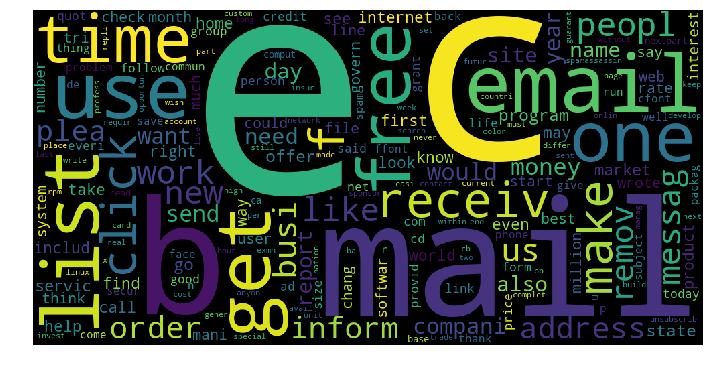

In [65]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(dictionary)

plt.figure(figsize=(12,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

*WordCloud ham*

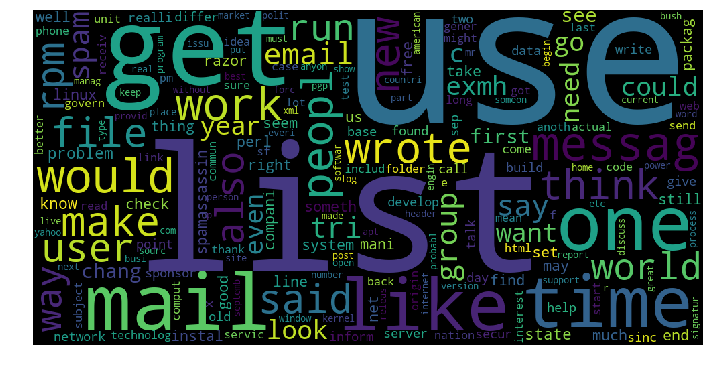

In [66]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(Counter(ham_words))

plt.figure(figsize=(12,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

*WordCloud spam*

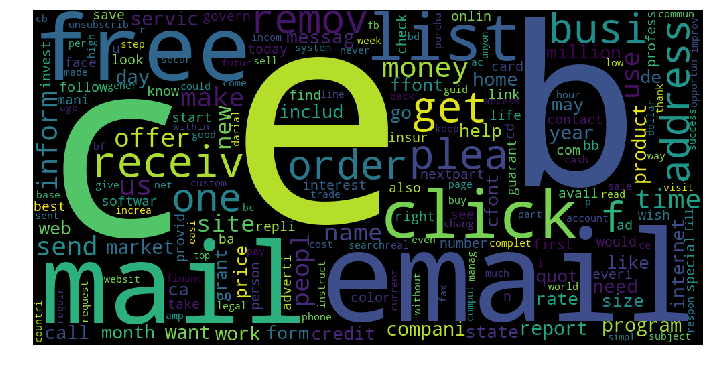

In [67]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(Counter(spam_words))

plt.figure(figsize=(12,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

## 2.2. Matriz de características <a class="anchor" id="matriz"></a>

In [68]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import shuffle

vectorizer = CountVectorizer(vocabulary=vocabulary, lowercase=False)

In [67]:
#vectorizer.fit_transform( [' '.join(ham_sms_tokens[0])] )

In [69]:
X = []
y = []

for file in ham_sms_tokens:
    #X.append(vectorizer.fit_transform([' '.join(file)]).todense())
    X.append(vectorizer.fit_transform([' '.join(file)]).toarray())
    y.append('ham')
    
for file in spam_sms_tokens:
    #X.append(vectorizer.fit_transform([' '.join(file)]).todense())
    X.append(vectorizer.fit_transform([' '.join(file)]).toarray())
    y.append('spam')
    
X_numpy = np.reshape(np.array(X), (len(X), -1))

In [70]:
dataset = pd.DataFrame(X_numpy, columns=vectorizer.get_feature_names())
dataset['class_y'] = np.array(y)
#dataset = dataset.sample(frac=1, random_state=12345).reset_index(drop=True)
dataset = shuffle(dataset, random_state=12345)
dataset.head(4)

,aa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,ab,abacha,abandon,abil,abl,absolut,absorb,abu,...,yni,york,young,yr,z,zealand,zero,zimbabw,zip,class_y
2470,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
2101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
1719,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
3598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,spam


# 3. Modelo <a class="anchor" id="modelo"></a>

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

Se definen funciones para ejecutar la validación cruzada y graficar la matriz de confusión

In [92]:
def evaluate_model_crossval(model, X, y, cv=10, seed=12345):
    kfold = KFold(n_splits=10, random_state=seed)
    scores = cross_val_score(model, X, y, cv=kfold)
    print(f'Cross-val score R2: {scores.mean():0.2f} (+/- {(scores.std() * 2):0.2f})')
    
    
def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.Blues, keras=False):
    cm = confusion_matrix(y_true, y_pred)
    if keras:
        classes = classes[unique_labels(y_true, y_pred)]
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

def plot_accuracy(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='lower right')
    plt.show()

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='upper right')
    plt.show()

Separar el dataset entre conjunto de entrenamiento y conjunto de prueba

In [74]:
#X_train, X_test, y_train, y_test = train_test_split(X_numpy, y, test_size=0.35, random_state=12345)
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop(['class_y'], axis=1), dataset['class_y'], test_size=0.35, random_state=12345)

### 3.1. Regresión Logística <a class="anchor" id="regresion_logistica"></a>

In [75]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9844155844155844

In [76]:
lr.predict(X_test)

array(['spam', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

**Validación cruzada**

In [77]:
lr = LogisticRegression(solver='liblinear')
evaluate_model_crossval(lr, X_train, y_train, cv=10)

Cross-val score R2: 0.98 (+/- 0.02)


**Matriz de confusión**

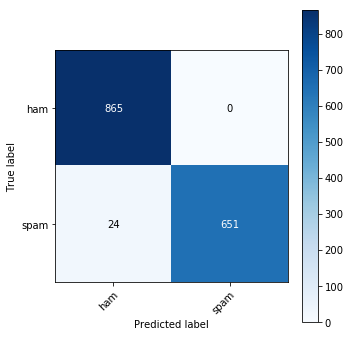

In [78]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

plot_confusion_matrix(
    y_test.values, 
    y_pred, 
    np.array(['ham', 'spam'], dtype='<U4')
);

### 3.2. Redes Neuronales <a class="anchor" id="ann"></a>

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
def build_model(n1, n2):
    
    model = Sequential()
    model.add(Dense(units=n1, activation = 'relu', input_shape=(3000,)))
    model.add(Dropout(0.3))
    model.add(Dense(units=n2, activation = 'relu'))
    model.add(Dense(units=1, activation = 'sigmoid'))
    
    model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return model

In [85]:
ann = build_model(512, 256)
ann.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               1536512   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 257       
Total params: 1,668,097
Trainable params: 1,668,097
Non-trainable params: 0
_________________________________________________________________


**Validación cruzada**

In [87]:
classifier = KerasClassifier(build_fn=build_model, n1=512, n2=256, epochs=16, batch_size=32, verbose=0)
evaluate_model_crossval(classifier, X_train, y_train, cv=10)

Cross-val score R2: 0.97 (+/- 0.02)


**Matriz de confusión**

In [81]:
enconder = LabelEncoder()
enconder.fit(y_train)

y_train_enc = enconder.transform(y_train)
y_test_enc = enconder.transform(y_test)

In [98]:
ann = build_model(512, 256)
ann.fit(X_train, y_train_enc, batch_size=32, epochs=16, validation_data=(X_test, y_test_enc))
y_pred = ann.predict(X_test)

Train on 2860 samples, validate on 1540 samples
Epoch 1/16
2860/2860 [==============================] - 5s 2ms/step - loss: 0.2205 - acc: 0.9357 - val_loss: 0.1057 - val_acc: 0.9721
Epoch 2/16
2860/2860 [==============================] - 4s 1ms/step - loss: 0.0745 - acc: 0.9867 - val_loss: 0.0530 - val_acc: 0.9864
Epoch 3/16
2860/2860 [==============================] - 4s 1ms/step - loss: 0.0354 - acc: 0.9930 - val_loss: 0.0867 - val_acc: 0.9825
Epoch 4/16
2860/2860 [==============================] - 4s 1ms/step - loss: 0.0452 - acc: 0.9930 - val_loss: 0.0695 - val_acc: 0.9857
Epoch 5/16
2860/2860 [==============================] - 4s 1ms/step - loss: 0.0287 - acc: 0.9948 - val_loss: 0.0921 - val_acc: 0.9831
Epoch 6/16
2860/2860 [==============================] - 5s 2ms/step - loss: 0.0300 - acc: 0.9955 - val_loss: 0.0699 - val_acc: 0.9799
Epoch 7/16
2860/2860 [==============================] - 5s 2ms/step - loss: 0.0416 - acc: 0.9923 - val_loss: 0.0883 - val_acc: 0.9844
Epoch 8/16
286

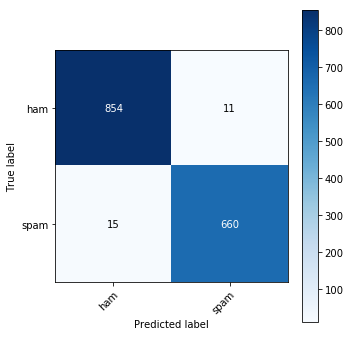

In [101]:
plot_confusion_matrix(
    y_test_enc, 
    y_pred > 0.5, 
    np.array(['ham', 'spam'], dtype='<U4'),
    keras=True
);

### 3.2.1 Búsqueda de parámetros óptimos <a class="anchor" id="ann_grid"></a>

In [82]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    'n1': [4, 8, 16, 32, 64, 128, 256, 512],
    'n2': [4, 8, 16, 32, 64, 128, 256, 512]
}
classifier = KerasClassifier(build_fn=build_model, epochs=16, batch_size=32, verbose=0)

kfold = KFold(n_splits=10, random_state=12345)
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', cv=kfold)
grid_search = grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(best_parameters)
print(best_accuracy)

Se disminuye el número de parámetros por cuestiones computacionales

In [87]:
parameters = {
    'n1': [8, 16, 32],
    'n2': [8, 16, 32]
}
classifier = KerasClassifier(build_fn=build_model, epochs=16, batch_size=32, verbose=1)

kfold = KFold(n_splits=3, random_state=12345)
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', cv=kfold)
grid_search = grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(best_parameters)
print(best_accuracy)

Epoch 1/16
1906/1906 [==============================] - 11s 6ms/step - loss: 0.6160 - acc: 0.7188
Epoch 2/16
1906/1906 [==============================] - 0s 219us/step - loss: 0.3626 - acc: 0.9234
Epoch 3/16
1906/1906 [==============================] - 0s 220us/step - loss: 0.2581 - acc: 0.9475
Epoch 4/16
1906/1906 [==============================] - 0s 226us/step - loss: 0.1974 - acc: 0.9732
Epoch 5/16
1906/1906 [==============================] - 0s 214us/step - loss: 0.1634 - acc: 0.9785
Epoch 6/16
1906/1906 [==============================] - 0s 214us/step - loss: 0.1419 - acc: 0.9827
Epoch 7/16
1906/1906 [==============================] - 0s 218us/step - loss: 0.1392 - acc: 0.9864
Epoch 8/16
1906/1906 [==============================] - 0s 225us/step - loss: 0.1079 - acc: 0.9858
Epoch 9/16
1906/1906 [==============================] - 0s 217us/step - loss: 0.0913 - acc: 0.9900
Epoch 10/16
1906/1906 [==============================] - 0s 214us/step - loss: 0.0970 - acc: 0.9885
Epoch 11/1

1906/1906 [==============================] - 0s 246us/step - loss: 0.0358 - acc: 0.9937
Epoch 11/16
1906/1906 [==============================] - 0s 232us/step - loss: 0.0383 - acc: 0.9927
Epoch 12/16
1906/1906 [==============================] - 0s 236us/step - loss: 0.0443 - acc: 0.9937
Epoch 13/16
1906/1906 [==============================] - 0s 251us/step - loss: 0.0508 - acc: 0.9921
Epoch 14/16
1906/1906 [==============================] - 0s 249us/step - loss: 0.0263 - acc: 0.9927
Epoch 15/16
1906/1906 [==============================] - 1s 288us/step - loss: 0.0212 - acc: 0.9953
Epoch 16/16
1906/1906 [==============================] - 0s 170us/step
Epoch 1/16
1907/1907 [==============================] - 12s 6ms/step - loss: 0.5256 - acc: 0.8123
Epoch 2/16
1907/1907 [==============================] - 0s 232us/step - loss: 0.2530 - acc: 0.9565
Epoch 3/16
1907/1907 [==============================] - 0s 248us/step - loss: 0.1614 - acc: 0.9743
Epoch 4/16
1907/1907 [=======================

1907/1907 [==============================] - 1s 285us/step - loss: 0.1507 - acc: 0.9712
Epoch 3/16
1907/1907 [==============================] - 1s 272us/step - loss: 0.0891 - acc: 0.9816
Epoch 4/16
1907/1907 [==============================] - 1s 273us/step - loss: 0.0679 - acc: 0.9848
Epoch 5/16
1907/1907 [==============================] - 1s 271us/step - loss: 0.0516 - acc: 0.9885
Epoch 6/16
1907/1907 [==============================] - 1s 278us/step - loss: 0.0413 - acc: 0.9900
Epoch 7/16
1907/1907 [==============================] - 1s 290us/step - loss: 0.0316 - acc: 0.9932
Epoch 8/16
1907/1907 [==============================] - 1s 291us/step - loss: 0.0277 - acc: 0.9937
Epoch 9/16
1907/1907 [==============================] - 1s 280us/step - loss: 0.0272 - acc: 0.9937
Epoch 10/16
1907/1907 [==============================] - 1s 283us/step - loss: 0.0236 - acc: 0.9953
Epoch 11/16
1907/1907 [==============================] - 1s 290us/step - loss: 0.0205 - acc: 0.9953
Epoch 12/16
1907/19

Epoch 16/16
1907/1907 [==============================] - 0s 185us/step
Epoch 1/16
1906/1906 [==============================] - 13s 7ms/step - loss: 0.4740 - acc: 0.8867
Epoch 2/16
1906/1906 [==============================] - 1s 271us/step - loss: 0.1854 - acc: 0.9696
Epoch 3/16
1906/1906 [==============================] - 1s 269us/step - loss: 0.0926 - acc: 0.9801
Epoch 4/16
1906/1906 [==============================] - 1s 265us/step - loss: 0.0663 - acc: 0.9874
Epoch 5/16
1906/1906 [==============================] - 1s 265us/step - loss: 0.0579 - acc: 0.9890
Epoch 6/16
1906/1906 [==============================] - 1s 269us/step - loss: 0.0383 - acc: 0.9921
Epoch 7/16
1906/1906 [==============================] - 1s 272us/step - loss: 0.0451 - acc: 0.9932
Epoch 8/16
1906/1906 [==============================] - 1s 266us/step - loss: 0.0231 - acc: 0.9953
Epoch 9/16
1906/1906 [==============================] - 1s 266us/step - loss: 0.0203 - acc: 0.9958
Epoch 10/16
1906/1906 [================

Parámetros óptimos:

In [88]:
print(best_parameters)
print(best_accuracy)

{'n1': 8, 'n2': 8}
0.9814685314685314


Historial de la búsqueda

In [89]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.981469 (0.000490) with: {'n1': 8, 'n2': 8}
0.981469 (0.003016) with: {'n1': 8, 'n2': 16}
0.977622 (0.002742) with: {'n1': 8, 'n2': 32}
0.981469 (0.002762) with: {'n1': 16, 'n2': 8}
0.981469 (0.001786) with: {'n1': 16, 'n2': 16}
0.978671 (0.001793) with: {'n1': 16, 'n2': 32}
0.979371 (0.004234) with: {'n1': 32, 'n2': 8}
0.980769 (0.000499) with: {'n1': 32, 'n2': 16}
0.974476 (0.006064) with: {'n1': 32, 'n2': 32}


In [90]:
ann = build_model(8, 8)
history = ann.fit(X_train, y_train_enc, batch_size=32, epochs=16, validation_data=(X_test, y_test_enc))

Train on 2860 samples, validate on 1540 samples
Epoch 1/16
2860/2860 [==============================] - 17s 6ms/step - loss: 0.5874 - acc: 0.7388 - val_loss: 0.3756 - val_acc: 0.9396
Epoch 2/16
2860/2860 [==============================] - 1s 321us/step - loss: 0.3302 - acc: 0.9157 - val_loss: 0.2070 - val_acc: 0.9688
Epoch 3/16
2860/2860 [==============================] - 1s 319us/step - loss: 0.2060 - acc: 0.9563 - val_loss: 0.1404 - val_acc: 0.9721
Epoch 4/16
2860/2860 [==============================] - 1s 353us/step - loss: 0.1533 - acc: 0.9657 - val_loss: 0.1079 - val_acc: 0.9747
Epoch 5/16
2860/2860 [==============================] - 1s 333us/step - loss: 0.1226 - acc: 0.9752 - val_loss: 0.0835 - val_acc: 0.9799
Epoch 6/16
2860/2860 [==============================] - 1s 329us/step - loss: 0.0963 - acc: 0.9822 - val_loss: 0.0712 - val_acc: 0.9825
Epoch 7/16
2860/2860 [==============================] - 1s 328us/step - loss: 0.0840 - acc: 0.9850 - val_loss: 0.0558 - val_acc: 0.9857
E

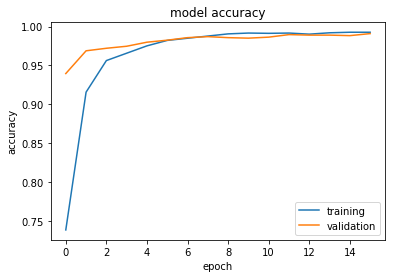

In [93]:
plot_accuracy(history)

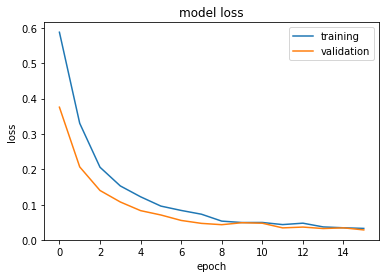

In [94]:
plot_loss(history)

Matriz de confusión

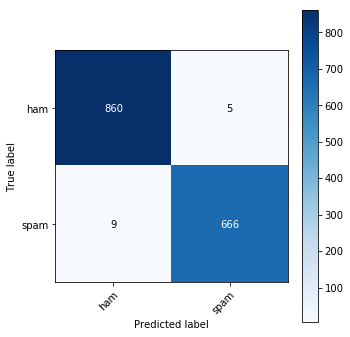

In [95]:
y_pred = ann.predict(X_test)
plot_confusion_matrix(
    y_test_enc, 
    y_pred > 0.5, 
    np.array(['ham', 'spam'], dtype='<U4'),
    keras=True
);

Resultado validación cruzada

In [96]:
classifier = KerasClassifier(build_fn=build_model, n1=8, n2=8, epochs=16, batch_size=32, verbose=0)
evaluate_model_crossval(classifier, X_train, y_train, cv=3)

Cross-val score R2: 0.98 (+/- 0.02)
